In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")
from pynq.lib.arduino import Arduino_Zsprinter
arduino = Arduino_Zsprinter(base.ARDUINO)

In [5]:
arduino.write("G28\n");

In [6]:
arduino.read_hotend_temp()

244.0

In [ ]:
arduino.write("M109 S220\n")

In [ ]:
arduino.update_bram()

In [ ]:
arduino.read_hotend_temp_target()

In [ ]:
arduino.read_hotend_temp_raw()

In [ ]:
arduino.write("M303\n")

In [ ]:
arduino.read_pid()

In [ ]:
arduino.read_current_position()

In [ ]:
arduino.write("G91\n");arduino.write("G1 E1\n");arduino.write("G90\n");

In [ ]:
arduino.write("M221 S200\n");

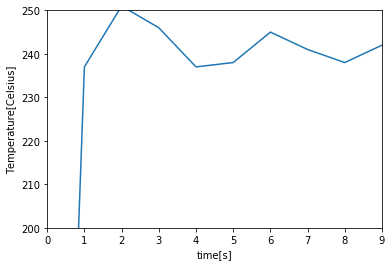

KeyboardInterrupt: 

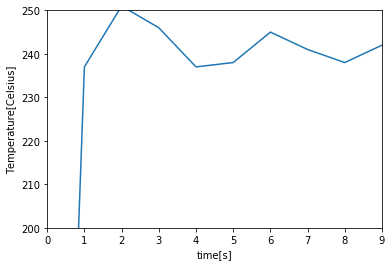

In [4]:
import time
def millis():
    return int(round(time.time() * 1000))

import time
BUFSIZE = 6
FAST_DELAY_TIME = 0.01

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time
ts = np.zeros(30)
ys = np.zeros(30)
t = 1
plt.ion()
plt.figure()
plt.show()
li, = plt.plot(ts, ys)
plt.ylim(-10, 300)
plt.xlabel("time[s]")
plt.ylabel("Temperature[Celsius]")
last = millis()

with open('data/octo2.gcode') as file:
    lines = file.readlines()    
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print("{0} {1}".format(idx,line.strip()),end='\r')
        arduino.write(cmd)
        current = millis()
        if(current-last>10000):
            ts = np.append(ts,t)
            ts = np.delete(ts, 0)
            t += 1
            y = arduino.read_hotend_temp()
            ys = np.append(ys,y)
            ys = np.delete(ys, 0)
            li.set_xdata(ts)
            li.set_ydata(ys)         
            plt.xlim(min(ts), max(ts))
            plt.ylim(200, 250)
            plt.draw()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            #time.sleep(1)
            last = current
#        print()

print("done")

In [ ]:
arduino.write("G1 X30\n")

In [ ]:
import time
def millis():
    return int(round(time.time() * 1000))

import time
BUFSIZE = 6
FAST_DELAY_TIME = 0.01

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time
ts = np.zeros(30)
ys = np.zeros(30)
t = 1
plt.ion()
plt.figure()
plt.show()
li, = plt.plot(ts, ys)
plt.ylim(-10, 300)
plt.xlabel("time[s]")
plt.ylabel("Temperature[Celsius]")
last = millis()
last2 = millis()
arduino.update_bram()
raw = arduino.read_hotend_temp_raw()        
target = arduino.read_hotend_temp_target()

with open('data/octo.gcode') as file:
    lines = file.readlines()
    line_number = 0
    buflen_accum_last = 0
    buflen_accum = 0   
    bufdiff = 0
    buflen_accum_finished = 0
    buflen_accum_finished_last = 0
    buflen_accum_finished_diff = 0
    
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print("{0} {1} raw:{2},tgt:{3},err:{4}".format(idx,line.strip(),raw,target,target-raw),end='\r')
        buflen_accum = int(arduino.read_buflen_accum()[0])
        buflen = int(arduino.read_buflen()[0])
        bufdiff = int(buflen_accum)-int(buflen_accum_last)
        arduino.write(cmd)
        cnt=0
        while(bufdiff<1):
            next_buffer_head = int(arduino.read_next_buffer_head()[0])
            buflen_accum_last = buflen_accum
            buflen_accum = int(arduino.read_buflen_accum()[0])
            bufdiff = int(buflen_accum)-int(buflen_accum_last)
            time.sleep(FAST_DELAY_TIME)
            cnt += 1
        cnt=0
        buflen = int(arduino.read_buflen()[0])
        buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
        if(buflen>=(BUFSIZE-1)):
            while True:
                time.sleep(FAST_DELAY_TIME)
                buflen_accum_finished_last = buflen_accum_finished
                buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
                buflen_accum_finished_diff = int(buflen_accum_finished)-int(buflen_accum_finished_last)
                buflen = int(arduino.read_buflen()[0])
                next_buffer_head = int(arduino.read_next_buffer_head()[0])
                if(buflen_accum_finished_diff>0):
                    break                
                cnt += 1
        current2 = millis()
        if(current2-last2>1000):
            arduino.update_bram()
            raw = arduino.read_hotend_temp_raw()        
            target = arduino.read_hotend_temp_target()
            last2 = current2
        current = millis()
        if(current-last>10000):
            ts = np.append(ts,t)
            ts = np.delete(ts, 0)
            t += 1
            y = arduino.read_hotend_temp()
            ys = np.append(ys,y)
            ys = np.delete(ys, 0)
            li.set_xdata(ts)
            li.set_ydata(ys)         
            plt.xlim(min(ts), max(ts))
            plt.ylim(200, 250)
            plt.draw()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            #time.sleep(1)
            last = current
        #print()

print("done")

In [ ]:
arduino.read_hotend_temp()

In [ ]:
arduino.write("M105\n")

In [ ]:
arduino.write("G92 X0 Y0 Z0 E0\n")

In [7]:
arduino.write("M109 S240\n")

In [ ]:
arduino.write("G92 X10 Y10 Z10\n")

In [ ]:
arduino.read_current_position()

In [12]:
import ipywidgets as widgets
from IPython.display import display
eup = widgets.Button(description="E +10")
edown = widgets.Button(description="E -10")
set_t = widgets.Button(description="Set T=240")
display(eup)
display(edown)
display(set_t)

def click_eup(b):
    arduino.write("G91\n")
    arduino.write("G1 E10\n")
    arduino.write("G90\n")

def click_edown(b):
    arduino.write("G91\n")
    arduino.write("G1 E-10\n")
    arduino.write("G90\n")

def click_set_t(b):
    arduino.write("M109 S240\n")

eup.on_click(click_eup)
edown.on_click(click_edown)
set_t.on_click(click_set_t)


Button(description='E +10', style=ButtonStyle())

Button(description='E -10', style=ButtonStyle())

Button(description='Set T=240', style=ButtonStyle())

In [ ]:
arduino.write("M109 S230\n")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time
ts = np.zeros(100)
ys = np.zeros(100)
t = 1
plt.ion()
plt.figure()
plt.show()
li, = plt.plot(ts, ys)
plt.ylim(-10, 250)
plt.xlabel("time[s]")
plt.ylabel("Temperature[Celsius]")
while True:
    ts = np.append(ts,t)
    ts = np.delete(ts, 0)
    t += 1
    #arduino.write("M105\n")
    y = arduino.read_hotend_temp()
    ys = np.append(ys,y)
    ys = np.delete(ys, 0)
    li.set_xdata(ts)
    li.set_ydata(ys)         
    plt.xlim(min(ts), max(ts))
    plt.draw()
    display.clear_output(wait=True)
    display.display(plt.gcf())
#     arduino.update_bram()
#     raw = arduino.read_hotend_temp_raw()
#     target = arduino.read_hotend_temp_target()
#     print("r:{0},t:{1},err:{2}".format(raw,target,(target-raw)),end='\r')
    time.sleep(1)

In [ ]:
arduino.read_hotend_temp()

In [ ]:
arduino.write("M105\n")

In [ ]:
arduino.read_hotend_temp()

In [ ]:
arduino.read_current_position()

In [ ]:
arduino.write("M114\n")

In [ ]:
arduino.read_current_position()

In [ ]:
import time
BUFSIZE = 6
DELAY_TIME = 0.1
FAST_DELAY_TIME = 0.01
FIRST_DELAY_TIME = 0.1

with open('data/octo.gcode') as file:
#with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    line_number = 0
    buflen_accum_last = 0
    buflen_accum = 0   
    bufdiff = 0
    buflen_accum_finished = 0
    buflen_accum_finished_last = 0
    buflen_accum_finished_diff = 0
    
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        buflen_accum = int(arduino.read_buflen_accum()[0])
        buflen = int(arduino.read_buflen()[0])
        bufdiff = int(buflen_accum)-int(buflen_accum_last)
        arduino.write(cmd)
        cnt=0
        while(bufdiff<1):
            next_buffer_head = int(arduino.read_next_buffer_head()[0])
            buflen_accum_last = buflen_accum
            buflen_accum = int(arduino.read_buflen_accum()[0])
            bufdiff = int(buflen_accum)-int(buflen_accum_last)
            time.sleep(FAST_DELAY_TIME)
            #print('.',end='')
            if(cnt%1000==0):
                print('buflen:',arduino.read_buflen()[0],end='')
                print(', buflen_accum',buflen_accum,end='')
                print(', bufdiff',bufdiff,end='')
                print('next_buffer_head:',next_buffer_head,end='')
                print()
            cnt += 1
        cnt=0
        buflen = int(arduino.read_buflen()[0])
        buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
        print('buflen:',arduino.read_buflen()[0],end='')
        print(', buflen_accum_finished:',buflen_accum_finished,end='')
        print()
        if(buflen>=(BUFSIZE-1)):
            while True:
                time.sleep(FAST_DELAY_TIME)
                buflen_accum_finished_last = buflen_accum_finished
                buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
                buflen_accum_finished_diff = int(buflen_accum_finished)-int(buflen_accum_finished_last)
                buflen = int(arduino.read_buflen()[0])
                next_buffer_head = int(arduino.read_next_buffer_head()[0])
#                 if(buflen<(BUFSIZE-1)):
#                     print("buflen freeed")
#                     break                                
                if(buflen_accum_finished_diff>0):
                    print("ISR finished")
                    break                
                if(cnt%1000==0):
                    print('buflen:',arduino.read_buflen()[0],end='')
                    print(', buflen_accum',buflen_accum,end='')
                    print(', bufdiff',bufdiff,end='')
                    print(', buflen_accum_finished:',buflen_accum_finished,end='')
                    print(', buflen_accum_finished_diff:',buflen_accum_finished_diff,end='')
                    print(', next_buffer_head:',next_buffer_head,end='')
                    print()
                cnt += 1
        print()
        #buflen_accum_last = buflen_accum

print("done")

In [ ]:
import time
BUFSIZE = 6
DELAY_TIME = 0.1
FAST_DELAY_TIME = 0.005
FIRST_DELAY_TIME = 0.1

with open('data/octo.gcode') as file:
#with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    line_number = 0
    buflen_accum_last = 0
    buflen_accum = 0   
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        buflen_accum = int(arduino.read_buflen_accum()[0])
        buflen = int(arduino.read_buflen()[0])
        bufdiff = int(buflen_accum)-int(buflen_accum_last)
        arduino.write(cmd)
        cnt=0
        while(bufdiff<1):
            buflen_accum_last = buflen_accum
            buflen_accum = int(arduino.read_buflen_accum()[0])
            bufdiff = int(buflen_accum)-int(buflen_accum_last)
            time.sleep(FAST_DELAY_TIME)
            #print('.',end='')
            if(cnt%100==0):
                print('buflen:',arduino.read_buflen()[0],end='')
                print(', buflen_accum',buflen_accum,end='')
                print(', bufdiff',bufdiff,end='')
                print()
            cnt += 1
        cnt=0
        buflen = int(arduino.read_buflen()[0])
        buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
        print('buflen:',arduino.read_buflen()[0],end='')
        print(', buflen_accum_finished:',buflen_accum_finished,end='')
        print()
        if(buflen>=(BUFSIZE-1)):
            while True:
                time.sleep(FAST_DELAY_TIME)
                buflen_accum_finished_last = buflen_accum_finished
                buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
                buflen_accum_finished_diff = int(buflen_accum_finished)-int(buflen_accum_finished_last)
                buflen = int(arduino.read_buflen()[0])
                if(buflen<(BUFSIZE-1)):
                    print("buflen freeed")
                    break                                
                if(buflen_accum_finished_diff>0):
                    print("ISR finished")
                    break                
                if(cnt%1000==0):
                    print('buflen:',arduino.read_buflen()[0],end='')
                    print(', buflen_accum',buflen_accum,end='')
                    print(', bufdiff',bufdiff,end='')
                    print(', buflen_accum_finished:',buflen_accum_finished,end='')
                    print(', buflen_accum_finished_diff:',buflen_accum_finished_diff,end='')
                    print()
                cnt += 1
        print()
        #buflen_accum_last = buflen_accum

print("done")

In [ ]:
g28 = "G28\n"
gcode = "G1 X1 Y2\n"
gcode1 = "G1 X2 Y4\n"
gcode2 = "G1 X3 Y6\n"
gcode3 = "G1 X0.3 Y0.6\n"
gcode4 = "G1 Z100\n"
gcode_comment = "; G-Code generated by Simplify3D(R) Version 4.0.0\n"
hoge = "G28 ; home all axes\n"
first = 'G28\n';
second = 'G1 Z0.325 F3000\n'
gcodes = [gcode,gcode1,gcode2]

In [ ]:
arduino.write(g28)

In [ ]:
import re
import sys
import pdb
from math import sqrt
import time

g0pattern = r"^G0.*"
g1pattern = r"^G1.*"
g0re = re.compile(g0pattern)
g1re = re.compile(g1pattern)

Xpattern = r".*X[-\.\d]+"
Ypattern = r".*Y[-\.\d]+"
Zpattern = r".*Z[-\.\d]+"
Fpattern = r".*F\d+"
Xre = re.compile(Xpattern)
Yre = re.compile(Ypattern)
Zre = re.compile(Zpattern)
Fre = re.compile(Fpattern)
BUFSIZE = 6
MINIMUM_DELAY_TIME = 0.3

In [ ]:
def parse(line,BUFSIZE,cnt,currentX,currentY,currentZ,currentF):
    if Xre.match(line): 
        nextX = float(re.findall(Xpattern,line)[0].split('X')[1])
    else:
        nextX = currentX
    if Yre.match(line): 
        nextY = float(re.findall(Ypattern,line)[0].split('Y')[1])
    else:
        nextY = currentY
    if Zre.match(line):
        nextZ = float(re.findall(Zpattern,line)[0].split('Z')[1])           
    else:
        nextZ = currentZ
    if Fre.match(line):
        nextF = float(re.findall(Fpattern,line)[0].split('F')[1])
    else:
        nextF = currentF
    dr = sqrt((nextX-currentX)**2+(nextY-currentY)**2+(nextZ-currentZ)**2)
    v = currentF/60
    t = dr/v #[s]
    return([t,nextX,nextY,nextZ,nextF])

In [ ]:
import time
delay_array = []
currentX = 0
currentY = 0
currentZ = 0
currentF = 1000
# with open('data/octo.gcode') as file:
with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    line_number = 0
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        if g0re.match(line) or g1re.match(line):
            [t,nextX,nextY,nextZ,nextF] = parse(line,BUFSIZE,line_number,currentX,currentY,currentZ,currentF)
            delay_array.append(max(t,MINIMUM_DELAY_TIME))            
        else:
            delay_array.append(MINIMUM_DELAY_TIME)                        
        if(line_number<BUFSIZE):
            arduino.write(line)
            time.sleep(MINIMUM_DELAY_TIME)
        else:
            dt = delay_array[line_number-BUFSIZE]
            arduino.write(line)
            print("wait:",dt)
            time.sleep(dt)
            currentX = nextX
            currentY = nextY
            currentZ = nextZ
            currentF = nextF 
        line_number += 1
print("done")

In [ ]:
arduino.write(gcode)

In [ ]:
arduino.write(gcode1)

In [ ]:
arduino.write(gcode2)

In [ ]:
arduino.write(hoge)

In [ ]:
arduino.write(first)

In [ ]:
import time
arduino.write("G28\n")
print("G28 finishied")
arduino.write('G1 Z0.325 F3000\n')
for i in range(15):
    print(i,end='')
    time.sleep(1)
print("Go down finishied")
with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        arduino.write(cmd)
        print(idx,line.strip(),end='')
        time.sleep(0.2)
print()
print("done")

In [ ]:
#import time

with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        time.sleep(0.7)
        print(idx,cmd)
        arduino.write(cmd)

In [ ]:
arduino.write('; G-Code generated by Simplify3D(R) Version 4.0.0')

In [ ]:
!cat data/octo.gcode

In [ ]:
!pwd